<a href="https://colab.research.google.com/github/AndriusBarauskas/podsearch-py/blob/main/%E2%80%9EData_Processing_with_NumPy_and_Pandas%E2%80%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: Data Wrangling with Python

## Sprint 2: Data Processing with NumPy and Pandas

## Part 5: Top 50 Spotify Tracks of 2020

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# LOADING THE DATA

In [ ]:
df = pd.read_csv('/content/spotifytoptracks.csv', encoding='latin-1')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   artist            50 non-null     object 
 2   album             50 non-null     object 
 3   track_name        50 non-null     object 
 4   track_id          50 non-null     object 
 5   energy            50 non-null     float64
 6   danceability      50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   acousticness      50 non-null     float64
 10  speechiness       50 non-null     float64
 11  instrumentalness  50 non-null     float64
 12  liveness          50 non-null     float64
 13  valence           50 non-null     float64
 14  tempo             50 non-null     float64
 15  duration_ms       50 non-null     int64  
 16  genre             50 non-null     object 
dtyp

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.3340,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.6790,123.950,183290,Nu-disco
5,5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,181733,Hip-Hop/Rap
6,6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,174000,Pop
7,7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap
8,8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.2360,127.087,159382,R&B/Hip-Hop alternative
9,9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,182161,Alternative/Indie


# PREPROCESSING

In [ ]:
# Drop unwanted columns
df = df.drop(['Unnamed: 0'], axis=1)
df

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.3340,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.6790,123.950,183290,Nu-disco
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,181733,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,174000,Pop
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.2360,127.087,159382,R&B/Hip-Hop alternative
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,182161,Alternative/Indie


# DATA CLEANING

## Handling missing values

In [ ]:
# Check if there are any missing values
if df.isnull().any().any():
    print("DataFrame contains missing values")
else:
    print("DataFrame has no missing data")

DataFrame has no missing data


## Removing duplicate samples and features.

In [ ]:
# Checking if there is any duplicate in a column
column = "track_name"

if df[column].is_unique:
    print(f"Column \"{column}\" has no duplicates")
else:
    df2 = df.drop_duplicates(keep='first')
    print(f"Duplicates removed from column \"{column}\"")
    df2

Column "track_name" has no duplicates


## Treating the outliers

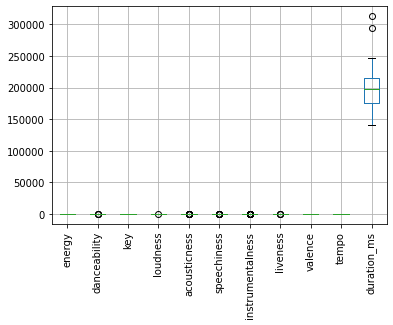

In [ ]:
# Drop non-numeric columns
df3 = df.select_dtypes(['number'])

# Create a box plot
df3.boxplot()

# Rotate X-axis ticks
plt.xticks(rotation = 90)

# Show the plot
plt.show()

### Option 1. Z-score

In [ ]:
# Calculate the Z-score of each value
z = np.abs(stats.zscore(df3))

# Identify the outliers
outliers = df3[z > 3]

# Print the number of outliers
print(f"Number of outliers: {outliers.shape[0]}")

# Print the outliers
print(outliers)

Number of outliers: 50
    energy  danceability  key  loudness  acousticness  speechiness  \
0      NaN           NaN  NaN       NaN           NaN          NaN   
1      NaN           NaN  NaN       NaN           NaN          NaN   
2      NaN           NaN  NaN       NaN           NaN          NaN   
3      NaN           NaN  NaN       NaN           NaN          NaN   
4      NaN           NaN  NaN       NaN           NaN          NaN   
5      NaN           NaN  NaN       NaN           NaN          NaN   
6      NaN           NaN  NaN       NaN           NaN          NaN   
7      NaN           NaN  NaN       NaN           NaN          NaN   
8      NaN           NaN  NaN       NaN           NaN          NaN   
9      NaN           NaN  NaN       NaN           NaN          NaN   
10     NaN           NaN  NaN       NaN           NaN          NaN   
11     NaN           NaN  NaN       NaN           NaN          NaN   
12     NaN           NaN  NaN       NaN           NaN          NaN 

### Option 2. Quartiles

In [ ]:
# Calculate the first and third quartiles
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Identify the outlier rows
outlier_rows = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]

# Print the outlier rows
print(outlier_rows)

   artist album track_name track_id  energy  danceability  key  loudness  \
0     NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
1     NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
2     NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
3     NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
4     NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
5     NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
6     NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
7     NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
8     NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
9     NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
10    NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
11    NaN   NaN        NaN      NaN     NaN           NaN  NaN       NaN   
12    NaN   

<ipython-input-115-3f4a8f99aa2b>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_rows = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]


### Option 3. Z-scores of each column

In [ ]:
# Calculate the Z-scores of each column
z_scores = stats.zscore(df3)

# Identify the outlier rows
outlier_rows = df3[(z_scores < -3).any(axis=1) | (z_scores > 3).any(axis=1)]

# Print the outlier rows
print(outlier_rows)

    energy  danceability  key  loudness  acousticness  speechiness  \
2    0.586         0.896   10    -6.687       0.10400       0.0559   
19   0.574         0.795    2    -6.903       0.06700       0.4870   
24   0.225         0.704    6   -14.454       0.90200       0.0994   
41   0.704         0.723   10    -7.088       0.02590       0.0571   
49   0.730         0.834    8    -3.714       0.00513       0.2220   

    instrumentalness  liveness  valence    tempo  duration_ms  
2            0.00000     0.790    0.642  116.971       196653  
19           0.00000     0.150    0.537  142.053       237918  
24           0.65700     0.106    0.243  120.006       245426  
41           0.00109     0.792    0.684  105.095       214935  
49           0.00000     0.124    0.446  155.008       312820  


# Exploratory data analysis

## How many observations are there in this dataset?

In [ ]:
nrows = df.shape[0]
print(f"There are {nrows} observations in this dataset")

There are 50 observations in this dataset


## How many features this dataset has?


In [ ]:
ncolumns = df.shape[1]
print(f"There are {ncolumns} features in this dataset")

There are 16 features in this dataset


## Which of the features are categorical?


In [ ]:
object_columns = df.select_dtypes(exclude=['number', 'bool']).columns.tolist()
print(object_columns)

['artist', 'album', 'track_name', 'track_id', 'genre']


## Which of the features are numeric?

In [ ]:
numeric_columns = df.select_dtypes('number').columns.tolist()
print(numeric_columns)

['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


## Are there any artists that have more than 1 popular track? If yes, which and how many?


In [ ]:
# Group the data by the 'artist' column and count the number of tracks
counts = df.groupby('artist').size().reset_index(name='count')

# Filter the counts DataFrame to select only the artists with more than 1 track
popular_artists = counts[counts['count'] > 1]

# Print the list of popular artists
print(popular_artists)

           artist  count
6   Billie Eilish      3
12       Dua Lipa      3
15   Harry Styles      2
19  Justin Bieber      2
22  Lewis Capaldi      2
26    Post Malone      2
38   Travis Scott      3


## Who was the most popular artist?


In [ ]:
# Group the data by the 'artist' column and count the number of tracks
counts = df.groupby('artist').size().reset_index(name='count')

# Sort the counts in descending order by the 'count' column
sorted_counts = counts.sort_values('count', ascending=False)

# Get the maximum count
max_count = sorted_counts['count'].max()

# Filter the sorted_counts DataFrame to select only the rows with the maximum count
popular_artists = sorted_counts[sorted_counts['count'] == max_count]

# Print the list of popular artists
print(popular_artists['artist'].tolist())

['Travis Scott', 'Billie Eilish', 'Dua Lipa']


## How many artists in total have their songs in the top 50?


In [ ]:
# Get the number of unique artists
num_artists = df['artist'].nunique()
print(f"Number of artists: {num_artists}")

Number of artists: 40


## Are there any albums that have more than 1 popular track? If yes, which and how many?


In [ ]:
# Group the data by the 'album' column and count the number of tracks
counts = df.groupby('album').size().reset_index(name='count')

# Filter the counts DataFrame to select only the albums with more than 1 track
popular_albums = counts[counts['count'] > 1]

# Get the number of rows in the popular_albums DataFrame
num_albums = popular_albums.shape[0]

# Print the count of popular albums
print(f"Number of popular albums: {num_albums}")

# Print the list of popular albums and their track counts
print(popular_albums)

Number of popular albums: 4
                   album  count
6                Changes      2
13             Fine Line      2
14      Future Nostalgia      3
19  Hollywood's Bleeding      2


## How many albums in total have their songs in the top 50?


In [ ]:
# Get the number of unique albums
num_albums = df['album'].nunique()
print(f"Number of albums: {num_albums}")

Number of albums: 45


## Which tracks have a danceability score above 0.7?


In [ ]:
# Filter the data to select only the tracks with a 'danceability' score above 0.7
danceable_tracks = df[df['danceability'] > 0.7]

# Print the list of danceable tracks
print(danceable_tracks['track_name'])

1                                      Dance Monkey
2                                           The Box
3                             Roses - Imanbek Remix
4                                   Don't Start Now
5                      ROCKSTAR (feat. Roddy Ricch)
7                  death bed (coffee for your head)
8                                           Falling
10                                             Tusa
13                                  Blueberry Faygo
14                         Intentions (feat. Quavo)
15                                     Toosie Slide
17                                           Say So
18                                         Memories
19                       Life Is Good (feat. Drake)
20                 Savage Love (Laxed - Siren Beat)
22                                      Breaking Me
24                              everything i wanted
25                                        SeÃ±orita
26                                          bad guy
27          

## Which tracks have a danceability score below 0.4?


In [ ]:
# Filter the data to select only the tracks with a 'danceability' score below 0.4
undanceable_tracks = df[df['danceability'] < 0.4]

# Print the 'track_name' column of the undanceable_tracks DataFrame
print(undanceable_tracks['track_name'])

44    lovely (with Khalid)
Name: track_name, dtype: object


## Which tracks have their loudness above -5?


In [ ]:
# Filter the data to select only the tracks with a 'loudness' value above -5
loud_tracks = df[df['loudness'] > -5]

# Print the list of loud tracks
print(loud_tracks['track_name'])

4                                   Don't Start Now
6                                  Watermelon Sugar
10                                             Tusa
12                                          Circles
16                                    Before You Go
17                                           Say So
21                                        Adore You
23                           Mood (feat. iann dior)
31                                   Break My Heart
32                                         Dynamite
33                 Supalonely (feat. Gus Dapperton)
35                  Rain On Me (with Ariana Grande)
37    Sunflower - Spider-Man: Into the Spider-Verse
38                                           HawÃ¡i
39                                          Ride It
40                                       goosebumps
43                                          Safaera
48                                         Physical
49                                       SICKO MODE
Name: track_

## Which tracks have their loudness below -8?


In [ ]:
# Filter the data to select only the tracks with a 'loudness' value below -8
quiet_tracks = df[df['loudness'] < -8]

# Print the list of quiet tracks
print(quiet_tracks['track_name'])

7                   death bed (coffee for your head)
8                                            Falling
15                                      Toosie Slide
20                  Savage Love (Laxed - Siren Beat)
24                               everything i wanted
26                                           bad guy
36                               HIGHEST IN THE ROOM
44                              lovely (with Khalid)
47    If the World Was Ending - feat. Julia Michaels
Name: track_name, dtype: object


## Which track is the longest?


In [ ]:
# Get the index of the row with the maximum 'duration' value
max_duration_index = df['duration_ms'].idxmax()

# Select the row with the maximum 'duration' value
longest_track = df.loc[max_duration_index]

# Print the longest track
print(f"The longest track \"{longest_track['track_name']}\" is {(longest_track['duration_ms']) / 1000} seconds duration.")

The longest track "SICKO MODE" is 312.82 seconds duration.


## Which track is the shortest?


In [ ]:
# get the index of the row with the minimum 'duration' value
min_duration_index = df['duration_ms'].idxmin()

# select the row with the minimum 'duration' value
shortest_track = df.loc[min_duration_index]

# print the shortest track
print(f"The shortest track \"{shortest_track['track_name']}\" is {(shortest_track['duration_ms']) / 1000} seconds duration.")

The shortest track "Mood (feat. iann dior)" is 140.526 seconds duration.


## Which genre is the most popular?


In [ ]:
# Count the number of occurrences of each genre
genre_counts = df['genre'].value_counts()

# Get the genre with the highest count
most_popular_genre = genre_counts.idxmax()

# Print the most popular genre
print(f"The most popular genre is {most_popular_genre}.")

The most popular genre is Pop.


## Which genres have just one song on the top 50?


In [ ]:
# Count the number of occurrences of each genre
genre_counts = df['genre'].value_counts()

# Select the genres with a count of 1
one_song_genres = genre_counts[genre_counts == 1]

# Print the one-song genres
print(one_song_genres)

Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: genre, dtype: int64


## How many genres in total are represented in the top 50?


In [ ]:
# Count the number of unique genres
num_genres = df['genre'].nunique()

# Print the number of genres
print(f"There are {num_genres} genres represented in the top 50.")

There are 16 genres represented in the top 50.


## Which features are strongly positively correlated?


In [ ]:
# Calculate the Pearson correlation coefficient for each pair of features
corr = df3.corr()

# Print the correlation coefficients
print(corr)

# Select pairs of features with a Pearson correlation coefficient greater than 0.7
strongly_correlated = corr[corr > 0.7]

# Print the strongly correlated pairs
print(strongly_correlated)

                    energy  danceability       key  loudness  acousticness  \
energy            1.000000      0.152552  0.062428  0.791640     -0.682479   
danceability      0.152552      1.000000  0.285036  0.167147     -0.359135   
key               0.062428      0.285036  1.000000 -0.009178     -0.113394   
loudness          0.791640      0.167147 -0.009178  1.000000     -0.498695   
acousticness     -0.682479     -0.359135 -0.113394 -0.498695      1.000000   
speechiness       0.074267      0.226148 -0.094965 -0.021693     -0.135392   
instrumentalness -0.385515     -0.017706  0.020802 -0.553735      0.352184   
liveness          0.069487     -0.006648  0.278672 -0.069939     -0.128384   
valence           0.393453      0.479953  0.120007  0.406772     -0.243192   
tempo             0.075191      0.168956  0.080475  0.102097     -0.241119   
duration_ms       0.081971     -0.033763 -0.003345  0.064130     -0.010988   

                  speechiness  instrumentalness  liveness   val

## Which features are strongly negatively correlated?


In [ ]:
# Calculate the Pearson correlation coefficient for each pair of features
corr = df3.corr()

# Select the pairs of features with a correlation coefficient less than -0.7
strongly_correlated = corr[corr < -0.7]

# Print the pairs of features
print(strongly_correlated)

                  energy  danceability  key  loudness  acousticness  \
energy               NaN           NaN  NaN       NaN           NaN   
danceability         NaN           NaN  NaN       NaN           NaN   
key                  NaN           NaN  NaN       NaN           NaN   
loudness             NaN           NaN  NaN       NaN           NaN   
acousticness         NaN           NaN  NaN       NaN           NaN   
speechiness          NaN           NaN  NaN       NaN           NaN   
instrumentalness     NaN           NaN  NaN       NaN           NaN   
liveness             NaN           NaN  NaN       NaN           NaN   
valence              NaN           NaN  NaN       NaN           NaN   
tempo                NaN           NaN  NaN       NaN           NaN   
duration_ms          NaN           NaN  NaN       NaN           NaN   

                  speechiness  instrumentalness  liveness  valence  tempo  \
energy                    NaN               NaN       NaN      NaN    

## Which features are not correlated?

In [ ]:
# Calculate the Pearson correlation coefficient for each pair of features
corr = df3.corr()

# Select the pairs of features with a correlation coefficient between -0.1 and 0.1
not_correlated = corr[(corr >= -0.1) & (corr <= 0.1)]

# Print the pairs of features
print(not_correlated)

                    energy  danceability       key  loudness  acousticness  \
energy                 NaN           NaN  0.062428       NaN           NaN   
danceability           NaN           NaN       NaN       NaN           NaN   
key               0.062428           NaN       NaN -0.009178           NaN   
loudness               NaN           NaN -0.009178       NaN           NaN   
acousticness           NaN           NaN       NaN       NaN           NaN   
speechiness       0.074267           NaN -0.094965 -0.021693           NaN   
instrumentalness       NaN     -0.017706  0.020802       NaN           NaN   
liveness          0.069487     -0.006648       NaN -0.069939           NaN   
valence                NaN           NaN       NaN       NaN           NaN   
tempo             0.075191           NaN  0.080475       NaN           NaN   
duration_ms       0.081971     -0.033763 -0.003345  0.064130     -0.010988   

                  speechiness  instrumentalness  liveness   val

# SCORE COMPARE

## Features comparison matrix

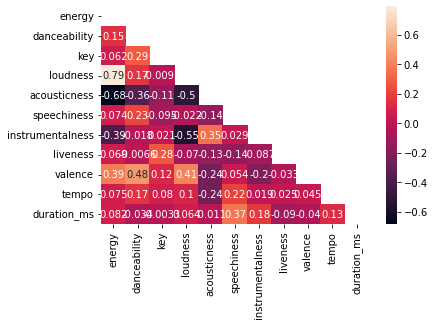

In [ ]:
import seaborn as sns

# Select the features to compare
features = ['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Calculate the pairwise correlations between the features
corr = df[features].corr()

# Visualize the lower triangle of the comparison matrix using a heatmap
sns.heatmap(corr, annot=True, mask=np.triu(np.ones(corr.shape)))

plt.show()

## How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
# Select the rows corresponding to each genre
pop = df[df["genre"] == "Pop"]
hip_hop_rap = df[df["genre"] == "Hip-Hop/Rap"]
dance_electronic = df[df["genre"] == "Dance/Electronic"]
alternative_indie = df[df["genre"] == "Alternative/Indie"]

# Calculate the mean danceability score for each genre
mean_pop_danceability = pop["danceability"].mean()
mean_hip_hop_rap_danceability = hip_hop_rap["danceability"].mean()
mean_dance_electronic_danceability = dance_electronic["danceability"].mean()
mean_alternative_indie_danceability = alternative_indie["danceability"].mean()

# Print the mean danceability scores
print("Mean Pop danceability:", mean_pop_danceability)
print("Mean Hip-Hop/Rap danceability:", mean_hip_hop_rap_danceability)
print("Mean Dance/Electronic danceability:", mean_dance_electronic_danceability)
print("Mean Alternative/Indie danceability:", mean_alternative_indie_danceability)

Mean Pop danceability: 0.6775714285714286
Mean Hip-Hop/Rap danceability: 0.7655384615384614
Mean Dance/Electronic danceability: 0.7550000000000001
Mean Alternative/Indie danceability: 0.6617500000000001


## How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
# Select the rows corresponding to each genre
pop = df[df["genre"] == "Pop"]
hip_hop_rap = df[df["genre"] == "Hip-Hop/Rap"]
dance_electronic = df[df["genre"] == "Dance/Electronic"]
alternative_indie = df[df["genre"] == "Alternative/Indie"]

# Calculate the mean loudness score for each genre
mean_pop_loudness = pop["loudness"].mean()
mean_hip_hop_rap_loudness = hip_hop_rap["loudness"].mean()
mean_dance_electronic_loudness = dance_electronic["loudness"].mean()
mean_alternative_indie_loudness = alternative_indie["loudness"].mean()

# Print the mean loudness scores
print("Mean Pop loudness:", mean_pop_loudness)
print("Mean Hip-Hop/Rap loudness:", mean_hip_hop_rap_loudness)
print("Mean Dance/Electronic loudness:", mean_dance_electronic_loudness)
print("Mean Alternative/Indie loudness:", mean_alternative_indie_loudness)

Mean Pop loudness: -6.460357142857143
Mean Hip-Hop/Rap loudness: -6.917846153846154
Mean Dance/Electronic loudness: -5.338
Mean Alternative/Indie loudness: -5.420999999999999


## How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
# Select the rows corresponding to each genre
pop = df[df["genre"] == "Pop"]
hip_hop_rap = df[df["genre"] == "Hip-Hop/Rap"]
dance_electronic = df[df["genre"] == "Dance/Electronic"]
alternative_indie = df[df["genre"] == "Alternative/Indie"]

# Calculate the mean acousticness score for each genre
mean_pop_acousticness = pop["acousticness"].mean()
mean_hip_hop_rap_acousticness = hip_hop_rap["acousticness"].mean()
mean_dance_electronic_acousticness = dance_electronic["acousticness"].mean()
mean_alternative_indie_acousticness = alternative_indie["acousticness"].mean()

# Print the mean acousticness scores
print("Mean Pop acousticness:", mean_pop_acousticness)
print("Mean Hip-Hop/Rap acousticness:", mean_hip_hop_rap_acousticness)
print("Mean Dance/Electronic acousticness:", mean_dance_electronic_acousticness)
print("Mean Alternative/Indie acousticness:", mean_alternative_indie_acousticness)

Mean Pop acousticness: 0.3238428571428571
Mean Hip-Hop/Rap acousticness: 0.18874076923076927
Mean Dance/Electronic acousticness: 0.09944
Mean Alternative/Indie acousticness: 0.5835
